In [2]:
from __future__ import print_function, division


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numexpr
import diffractio
# configuration
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio import um, sp, np, degrees
from numpy import ones, zeros, shape

from diffractio import degrees, mm, plt, sp, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

number of processors: 8


In [56]:
def fiber (u, width1, width2, x0, n1, n2, angle):
        '''Fibra óptica

        Args:
        x0 (float): Altura del centro de la fibra
        width1 (float): Ancho del nucleo de la  fibra
        width2 (float): Ancho total de la  fibra
        n1(float): Indice de refraccion del nucleo
        n2(float): Indice de refraccion de la fibra
        angle(float): angulo de la fibra

        Example:'''
        
        xmax=x0+width2
        xmin=x0-width2
        xn_max=x0+width1
        xn_min=x0-width1
        
        Xrot, Zrot = u.__rotate__(angle,(25*um,25*um))

        u1 = ones(u.X.shape,dtype=complex)
        u1[(Xrot > xmin) & (Xrot < xmax)] = n2
        u1[(Xrot > xn_min) & (Xrot < xn_max)] = n1
        
        u.n=u1
        
        return u

## Ejemplo 1

In [156]:
x0 = sp.linspace(-55 * um, 55 * um, 2048)
z0 = sp.linspace(0 * um, 5*mm, 2048*2)

wavelength = 0.550 * um

In [157]:
u1=Scalar_mask_XZ(wavelength=wavelength, x=x, z=z)

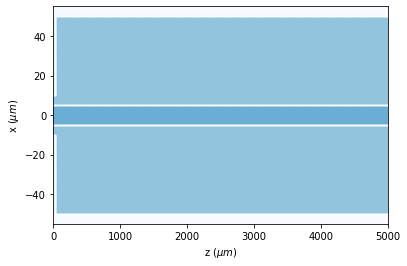

In [158]:
# Initial parameters

u0 = Scalar_source_X(x=x0, wavelength = 550 * um)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0= 5 * um, theta=0. * degrees)
#u0.plane_wave(A=1, z0=0 * um, theta=0. * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)  # insert field

n1 = 1.5 # nucleus index
n2 = 1.4 # cladding index

u1 = fiber (u1,5*um, 50*um, 0*um, n1, n2, 0*degrees)
u1.rectangle(r0 = (30,10), size = (40,20), refraction_index = 2.0j, angle = 0*degrees)
u1.rectangle(r0 = (-30,10), size = (40,20), refraction_index = 2j, angle = 0*degrees)

# draw refraction index
u1.draw_refraction_index()

# BPM propagation 
u1.BPM(verbose=False)

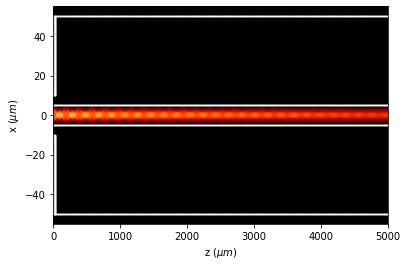

In [159]:
# draw results
u1.draw(logarithm=True, normalize='maximum', draw_borders=True)

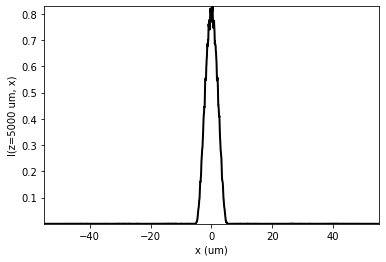

In [160]:
u1.profile_transversal(kind='intensity', z0=5000, draw=True)
plt.show()

### other case

In [182]:
x0 = sp.linspace(-25 * um, 25 * um, 2048*4)
z0 = sp.linspace(0 * um, 5*mm, 2048*4)

wavelength = .5 * um

In [195]:
u0 = Scalar_source_X(x=x0, wavelength =wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=5 * um, theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)  # insertÇ field
u1= fiber (u1, 5*um, 25*um, 0*um, 1.5,1.65, 0*degrees)

In [196]:
# BPM propagation 
u1.BPM(verbose=False)

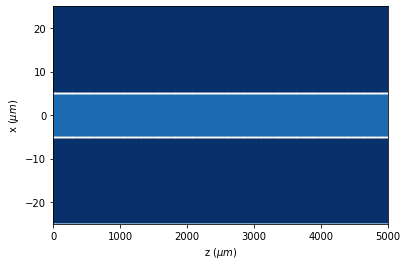

In [197]:
# draw refraction index
u1.draw_refraction_index()

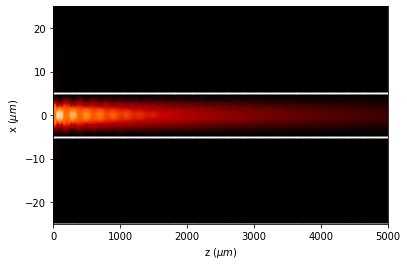

In [198]:
# draw results
u1.draw(logarithm=True, normalize='maximum', draw_borders=True)


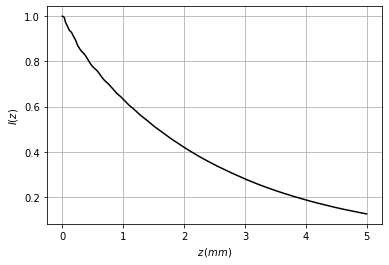

In [199]:
u1.check_intensity();

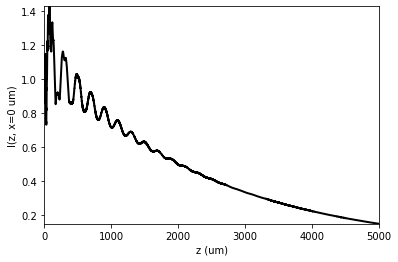

In [200]:
u1.profile_longitudinal(x0=0);